In [7]:
from environment import Environment
from mongodb import Database
from collections import defaultdict
import numpy as np

import requests

In [4]:
db = Database()
env = Environment(db)

In [5]:
state_raw = [1, 0, 1, 'mang-may-tinh']

In [6]:
memory = defaultdict(list)

# When a new transition is received:
def store_transition(user_id, state, reward, next_state, done):
    transition = (state, reward, next_state, done)
    memory[user_id].append(transition)

In [ ]:
test_transitions = {
    "user_id": "669d16e11db84069209550bd",
    "transitions": [
        {
            "state": [
                "79f1fc83-d117-44dc-ab1c-6c1d7c02304b", 
                1,
                0, 
                1,
                "mang-may-tinh" 
            ], 
            "action": "3b6fd0b3-414b-464e-83f1-404d78be26c9",
            "next_state": [
                "3b6fd0b3-414b-464e-83f1-404d78be26c9",
                0,
                1,
                0,
                "mang-may-tinh"
            ],
            "done": 0 
        },
        {
            "state": [
                "3b6fd0b3-414b-464e-83f1-404d78be26c9",
                0,
                1,
                0,
                "mang-may-tinh"
            ], 
            "action": "0304f6be-0591-419e-a6cb-c10db2c1cbeb",
            "next_state": [
                "0304f6be-0591-419e-a6cb-c10db2c1cbeb",
                0,
                1,
                1,
                "cong-nghe-thong-tin"
            ],
            "done": 0
        },
        {
            "state": [
                "0304f6be-0591-419e-a6cb-c10db2c1cbeb",
                0,
                1,
                0,
                "cong-nghe-thong-tin"
            ], 
            "action": "4d6363a0-63fb-4e4f-b6f8-0e3d95e99065",
            "next_state": [
                "4d6363a0-63fb-4e4f-b6f8-0e3d95e99065",
                0,
                1,
                0,
                "thong-tin-xu-ly-thong-tin"
            ],
            "done": 0
        },
        {
            "state": [
                "4d6363a0-63fb-4e4f-b6f8-0e3d95e99065",
                0,
                1,
                0,
                "thong-tin-xu-ly-thong-tin"
            ], 
            "action": "43d9a5e4-ffb4-4224-8110-648902976486",
            "next_state": [
                "43d9a5e4-ffb4-4224-8110-648902976486",
                1,
                1,
                0,
                "giai-quyet-bai-toan-tren-mtdt"
            ],
            "done": 0       
        },
        {
            "state": [
                "43d9a5e4-ffb4-4224-8110-648902976486",
                1,
                1,
                0,
                "giai-quyet-bai-toan-tren-mtdt"
            ],
            "action": "76cee16c-cffb-4dce-a2b2-94a0ae2f87c3",
            "next_state": [
                "76cee16c-cffb-4dce-a2b2-94a0ae2f87c3",
                0,
                1,
                0,
                "mang-may-tinh"
            ],
            "done": 1
        }
    ]
}

In [17]:
import numpy as np
import matplotlib.pyplot as plt

from score_history import Score
from environment import Environment
from mongodb import Database
from actor_critic import Agent
from print_module import Print

'''Get score history'''
Score()

def plot_learning_curve(x, scores, figure_file):
    # Calculate the running average of the last 100 scores
    running_avg = np.zeros(len(scores))
    for i in range(len(running_avg)):
        running_avg[i] = np.mean(scores[max(0, i-100):(i+1)])
    
    # Create the plot
    plt.plot(x, scores, label='Score')
    plt.plot(x, running_avg, label='Running Average (100)', color='orange')
    plt.title('Learning Curve')
    plt.xlabel('User ID')
    plt.ylabel('Score')
    plt.legend(loc='upper left')

    # Save the plot to the specified file
    plt.savefig(figure_file)
    plt.show()

file_name = 'score_history.png'
figure_file = 'plots/' + file_name

In [18]:
from score_history import Score

score_history, best_score = Score().load_state()
print(score_history)
print(best_score)

[0.4, 0.8, 0.8, 0.8, 1.2000000000000002, 1.6, 2.0, 0.7999999999999998, 0.7999999999999998, 0.7999999999999998, -0.40000000000000036, -1.2000000000000004, -0.8000000000000004, -1.6000000000000005, -1.2000000000000006, -0.8000000000000006, -1.6000000000000005, -2.4000000000000004, -2.0000000000000004, -1.6000000000000005, -2.4000000000000004, -3.2, -2.8000000000000003, -2.4000000000000004, -2.0000000000000004, -2.8000000000000007, -2.400000000000001, -2.000000000000001, -2.8000000000000007, -2.400000000000001, -2.000000000000001, -2.8000000000000007, -2.400000000000001, -2.000000000000001, -2.000000000000001, -2.000000000000001, -2.8000000000000007, -2.400000000000001, -2.000000000000001, -1.600000000000001, -1.200000000000001, -0.800000000000001, -0.400000000000001, -9.992007221626409e-16, -0.800000000000001, -0.400000000000001, -9.992007221626409e-16, -0.800000000000001, -0.400000000000001, -9.992007221626409e-16, 0.399999999999999, 0.799999999999999, 1.199999999999999, 1.5999999999999

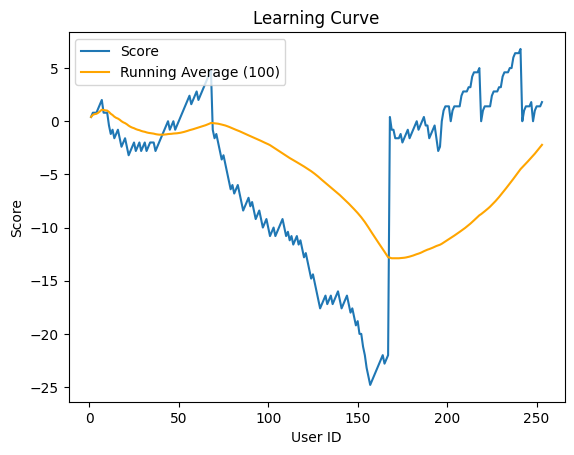

[SUCCESS] Plot saved to plots/score_history.png


In [20]:
score_history, best_score = Score().load_state()
x = [i+1 for i in range(len(score_history))]
plot_learning_curve(x, score_history, figure_file)
Print.success(f"Plot saved to {figure_file}")

[0.4, 0.8, 0.8, 0.8, 1.2000000000000002, 1.6, 2.0, 0.7999999999999998, 0.7999999999999998, 0.7999999999999998, -0.40000000000000036, -1.2000000000000004, -0.8000000000000004, -1.6000000000000005, -1.2000000000000006, -0.8000000000000006, -1.6000000000000005, -2.4000000000000004, -2.0000000000000004, -1.6000000000000005, -2.4000000000000004, -3.2, -2.8000000000000003, -2.4000000000000004, -2.0000000000000004, -2.8000000000000007, -2.400000000000001, -2.000000000000001, -2.8000000000000007, -2.400000000000001, -2.000000000000001, -2.8000000000000007, -2.400000000000001, -2.000000000000001, -2.000000000000001, -2.000000000000001, -2.8000000000000007, -2.400000000000001, -2.000000000000001, -1.600000000000001, -1.200000000000001, -0.800000000000001, -0.400000000000001, -9.992007221626409e-16, -0.800000000000001, -0.400000000000001, -9.992007221626409e-16, -0.800000000000001, -0.400000000000001, -9.992007221626409e-16, 0.399999999999999, 0.799999999999999, 1.199999999999999, 1.5999999999999

In [16]:
len(score_history)

241